# Final Project - Final Utilities
![Olympic Rings](https://idrottsforum.org/wp-content/uploads/2019/02/winter-olympics.jpg)

In [2]:
import pip
!pip install pandas geopandas geopy matplotlib seaborn descartes

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read the dataset

In [4]:
athletes = pd.read_csv('data/athlete_events.csv')
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### Quiz

Here you have space for your work on the quiz! Good luck and have fun!

In [5]:
# YOUR CODE HERE
# raise NotImplementedError()

### Extract host cities

In [6]:
hosts = athletes.loc[:, ['Games', 'City']]
hosts.drop_duplicates(inplace=True)
# hosts['City'].value_counts()
# hosts['City'].unique()
host_cities = pd.DataFrame(hosts['City'].unique(), columns=['City'])
host_cities.head()

,City
0,Barcelona
1,London
2,Antwerpen
3,Paris
4,Calgary


### "Reverse-locate" latitude and longitude

We are using GeoPandas to display maps. See [these instructions](https://geopandas.org/install.html) on how to install GeoPandas.

In [7]:
import geopandas as gpd
from  geopy.geocoders import Nominatim

In [8]:
geolocator = Nominatim(user_agent='TestForOlympic', timeout=100)  # set agent name according to your project
latitudes = []
longitudes = []

for c in host_cities['City']:
    loc = geolocator.geocode(c, timeout=100)  # time out to prevent being denied access
    print(loc)
    latitudes.append(loc.latitude)
    longitudes.append(loc.longitude)

Barcelona, Barcelonès, Barcelona, Catalunya, 08001, España
London, Greater London, England, SW1A 2DX, United Kingdom
Antwerpen, Vlaanderen, 2000, België / Belgique / Belgien
Paris, Île-de-France, France métropolitaine, France
Calgary, Alberta, Canada
Albertville, Savoie, Auvergne-Rhône-Alpes, France métropolitaine, 73200, France
Lillehammer, Innlandet, Norge
Los Angeles, Los Angeles County, California, United States
Salt Lake City, Salt Lake County, Utah, 84139, United States
Helsinki, Helsingin seutukunta, Uusimaa, Etelä-Suomen aluehallintovirasto, Manner-Suomi, Suomi
Lake Placid, North Elba, Essex County, New York, United States
Sydney, New South Wales, Australia
Atlanta, Georgia, United States
Stockholm, Stockholms kommun, Stockholms län, 111 29, Sverige
Сочи, городской округ Сочи, Краснодарский край, Южный федеральный округ, Россия
長野県, 日本
Torino, Piemonte, Italia
北京市, 东城区, 北京市, 100010, 中国
Rio de Janeiro, Região Geográfica Imediata do Rio de Janeiro, Região Metropolitana do Rio de 

Adding the captured latitudinal and longitudinal data to the data frame.

In [9]:
host_cities['latitude'] = latitudes
host_cities['longitude'] = longitudes
host_cities.head()

,City,latitude,longitude
0,Barcelona,41.382894,2.177432
1,London,51.507322,-0.127647
2,Antwerpen,51.221110,4.399708
3,Paris,48.858890,2.320041
4,Calgary,51.046095,-114.065465


### Define geometry points
Let's do that by means of a GeoDataFrame. Here we use the input from the DataFrame fille previously.

In [10]:
host_cities = gpd.GeoDataFrame(host_cities, geometry=gpd.points_from_xy(host_cities.longitude, host_cities.latitude))
host_cities.head()

,City,latitude,longitude,geometry
0,Barcelona,41.382894,2.177432,POINT (2.17743 41.38289)
1,London,51.507322,-0.127647,POINT (-0.12765 51.50732)
2,Antwerpen,51.221110,4.399708,POINT (4.39971 51.22111)
3,Paris,48.858890,2.320041,POINT (2.32004 48.85889)
4,Calgary,51.046095,-114.065465,POINT (-114.06547 51.04610)


### Draw and save map
With this piece of code you can create your own map. For more on maps, stay tuned to the lab on maps.

Text(0.5, 1.0, 'Olympic Game Hosts Since 1896')

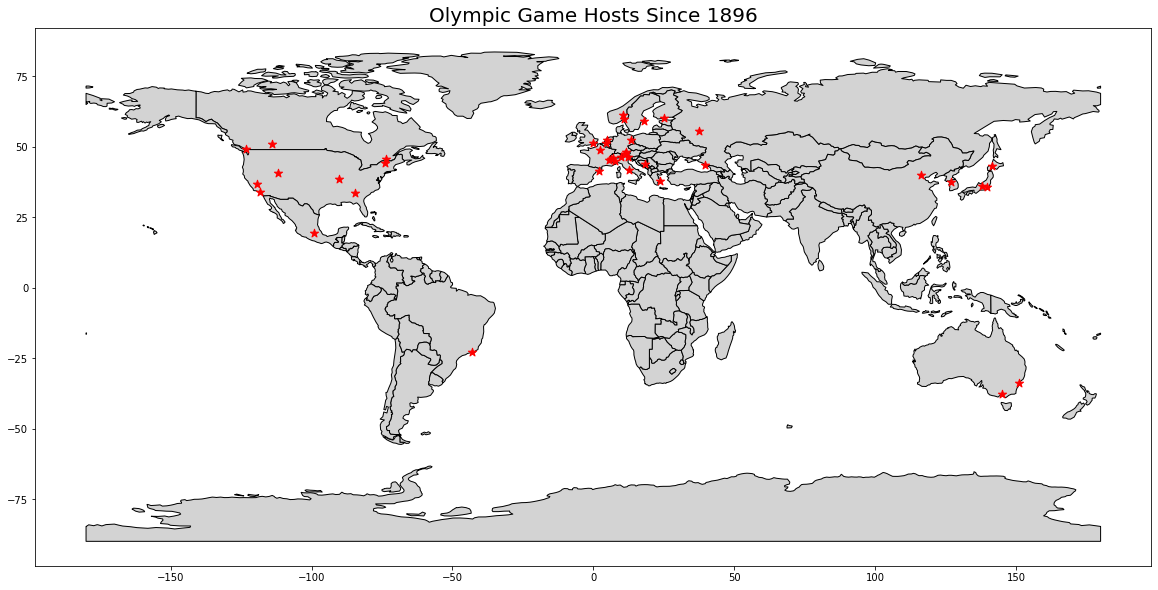

In [11]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base = world.plot(color='lightgrey', edgecolor='black', figsize=(20,10))
host_cities.plot(ax=base, marker='*', color='red', markersize=75)

# annotation - but it is not useful for this example
#for x, y, label in zip(host_cities.geometry.x, host_cities.geometry.y, host_cities.City):
#    base.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

plt.title('Olympic Game Hosts Since 1896', fontsize=20)
#plt.savefig('olympic_hosts.png', dpi=100)  # increase dpi for poster version


/var/folders/z_/fx361rr12rqcvdk9vc6vj9s80000gn/T/ipykernel_9639/3940600012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  austrians['MedalNr'] = 0
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyda

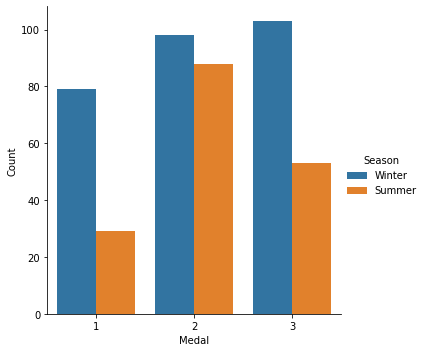

In [12]:
austrians = athletes[athletes.NOC == "AUT"]
austrians['MedalNr'] = 0
austrians.dropna(subset=["Medal"],inplace=True)
austrians.Medal.replace({'Gold':1,'Silver':2,'Bronze':3}, inplace=True)
temp = pd.DataFrame(austrians.loc[:,['Medal','Season']].value_counts(),columns=['Count']).reset_index()
temp.dtypes
sns.catplot(data=temp,kind='bar',x='Medal',y='Count',hue='Season')
# sns.barplot(data=austrians,y='Medal')

/var/folders/z_/fx361rr12rqcvdk9vc6vj9s80000gn/T/ipykernel_9639/912611642.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  austrians['MedalNr'] = 0
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydat

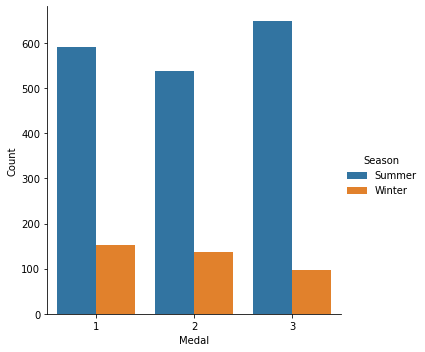

In [13]:
austrians = athletes[athletes.NOC == "GER"]
austrians['MedalNr'] = 0
austrians.dropna(subset=["Medal"],inplace=True)
austrians.Medal.replace({'Gold':1,'Silver':2,'Bronze':3}, inplace=True)
temp = pd.DataFrame(austrians.loc[:,['Medal','Season']].value_counts(),columns=['Count']).reset_index()
temp.dtypes
sns.catplot(data=temp,kind='bar',x='Medal',y='Count',hue='Season')

In [14]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
medalsPerCountry = athletes
medalsPerCountry.dropna(subset=["Medal"],inplace=True)
medalsPerCountry.Medal.replace({'Gold':1,'Silver':2,'Bronze':3}, inplace=True)
medalsPerCountry = pd.DataFrame(medalsPerCountry.loc[:,['NOC']].value_counts(),columns=['Count']).reset_index()
world.loc[world['iso_a3']=='USA'].pop_est
medalsPerCountry['val']= medalsPerCountry.apply(lambda row: world.loc[world['iso_a3']==row.NOC].pop_est, axis=1)
medalsPerCountry.head()

ValueError: Wrong number of items passed 81, placement implies 1

In [15]:
athletes = pd.read_csv('data/athlete_events.csv')
noc = pd.read_csv('data/noc_regions.csv')
merged = athletes.merge(noc, on="NOC", how="outer").fillna("")
merged.to_csv("data/merged.csv", index=False)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.to_csv("data/world.csv")